In [15]:
from models.CNN import CNN, plot_training
from torch.utils.data import DataLoader
from utils.customDataset import CustomDataset
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

## Loading Data

In [2]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
X_filenames = df_data.iloc[:,0].values
species = df_data['species'].unique()

# Creation of the targets vector
t = np.zeros((len(X_filenames),species.size)) 
for i in range(species.size):
    t[df_data['species'] == species[i], i] = 1

In [4]:
X_train_filenames, X_test_filenames, t_train, t_test = train_test_split(X_filenames, t, test_size=0.3, random_state=0)

In [5]:
img_size = 32

batch_size = 1

dataset_train = CustomDataset('../data/images', filenames=X_train_filenames, targets=t_train, img_size=img_size)
dataset_test = CustomDataset('../data/images', filenames=X_test_filenames, targets=t_test, img_size=img_size)
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

## CNN without regularization

In [6]:
model = CNN(num_epochs=100)
model.set_model(output_size=species.size)
model.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [16]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

KeyboardInterrupt: 

In [ ]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

In [ ]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## CNN with regularization

In [6]:
model_reg = CNN(num_epochs=200)
model_reg.set_model(output_size=species.size)
model_reg.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [7]:
loss_train, accuracy_train, loss_test, accuracy_test = model_reg.training(train_dataloader, test_dataloader)

Epoch 1/200, Loss: 4.62320, Accuracy: 0.87%
Epoch 2/200, Loss: 4.57927, Accuracy: 1.44%
Epoch 3/200, Loss: 4.53552, Accuracy: 2.31%
Epoch 4/200, Loss: 4.44901, Accuracy: 4.33%
Epoch 5/200, Loss: 4.21821, Accuracy: 7.36%
Epoch 6/200, Loss: 3.89273, Accuracy: 10.39%
Epoch 7/200, Loss: 3.50389, Accuracy: 15.01%
Epoch 8/200, Loss: 3.18313, Accuracy: 18.90%
Epoch 9/200, Loss: 2.92466, Accuracy: 19.77%
Epoch 10/200, Loss: 2.64346, Accuracy: 25.54%
Epoch 11/200, Loss: 2.46157, Accuracy: 30.45%
Epoch 12/200, Loss: 2.29436, Accuracy: 33.62%
Epoch 13/200, Loss: 2.16482, Accuracy: 36.51%
Epoch 14/200, Loss: 1.98757, Accuracy: 40.69%
Epoch 15/200, Loss: 1.87176, Accuracy: 43.29%
Epoch 16/200, Loss: 1.73124, Accuracy: 46.32%
Epoch 17/200, Loss: 1.66842, Accuracy: 49.49%
Epoch 18/200, Loss: 1.53888, Accuracy: 52.09%
Epoch 19/200, Loss: 1.44406, Accuracy: 55.41%
Epoch 20/200, Loss: 1.38934, Accuracy: 58.15%
Epoch 21/200, Loss: 1.31891, Accuracy: 59.45%
Epoch 22/200, Loss: 1.25575, Accuracy: 60.61%
Ep

In [8]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 58.92% on test data


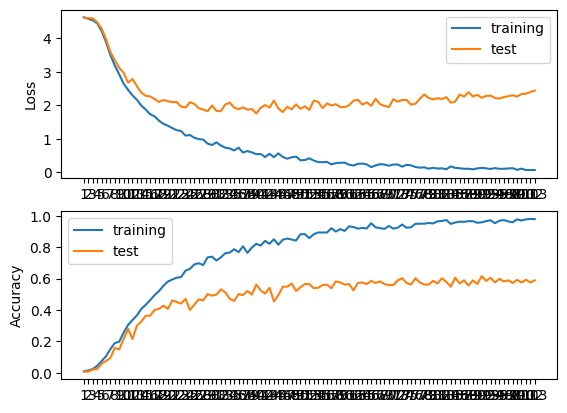

In [9]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## CNN with PReLU function

In [10]:
model = CNN(num_epochs=100)
model.set_model(output_size=species.size, activation_function='prelu')
model.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [11]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.61081, Accuracy: 1.59%
Epoch 2/100, Loss: 4.52720, Accuracy: 1.88%
Epoch 3/100, Loss: 4.19447, Accuracy: 8.80%
Epoch 4/100, Loss: 3.46442, Accuracy: 17.60%
Epoch 5/100, Loss: 2.77858, Accuracy: 28.28%
Epoch 6/100, Loss: 2.28626, Accuracy: 36.51%
Epoch 7/100, Loss: 1.94191, Accuracy: 45.02%
Epoch 8/100, Loss: 1.63898, Accuracy: 51.52%
Epoch 9/100, Loss: 1.45387, Accuracy: 57.29%
Epoch 10/100, Loss: 1.29583, Accuracy: 60.17%
Epoch 11/100, Loss: 1.09899, Accuracy: 64.65%
Epoch 12/100, Loss: 1.02929, Accuracy: 68.83%
Epoch 13/100, Loss: 0.87416, Accuracy: 72.58%
Epoch 14/100, Loss: 0.79536, Accuracy: 75.04%
Epoch 15/100, Loss: 0.78036, Accuracy: 75.76%
Epoch 16/100, Loss: 0.69581, Accuracy: 78.35%
Epoch 17/100, Loss: 0.54099, Accuracy: 83.26%
Epoch 18/100, Loss: 0.59360, Accuracy: 80.52%
Epoch 19/100, Loss: 0.44761, Accuracy: 86.58%
Epoch 20/100, Loss: 0.48553, Accuracy: 84.99%
Epoch 21/100, Loss: 0.41924, Accuracy: 86.44%
Epoch 22/100, Loss: 0.34505, Accuracy: 88.74%


In [12]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 57.91% on test data


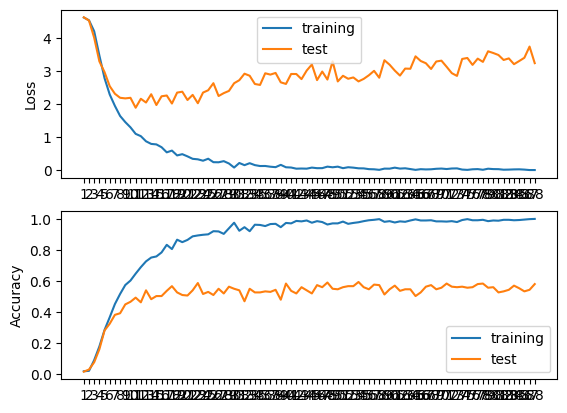

In [13]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## K-fold cross-validation

In [14]:
model = CNN(num_epochs=100)
model.set_model(output_size=species.size)
best_params, accuracy_historic = model.k_fold_cross_validation(X_train_filenames, t_train, img_size=img_size)

testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.388
K = 1, accuracy: 0.000
K = 2, accuracy: 0.353
K = 3, accuracy: 0.428
K = 4, accuracy: 0.341
Best val accuracy: 0.302 | lr: 1e-04 | l2_reg: 1e-07
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.374
K = 1, accuracy: 0.338
K = 2, accuracy: 0.273
K = 3, accuracy: 0.007
K = 4, accuracy: 0.007
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.022
K = 1, accuracy: 0.302
K = 2, accuracy: 0.360
K = 3, accuracy: 0.014
K = 4, accuracy: 0.014
testing parameters: learning_rate = 1e-04,    regularization = 1e-04
K = 0, accuracy: 0.014
K = 1, accuracy: 0.022
K = 2, accuracy: 0.022
K = 3, accuracy: 0.268
K = 4, accuracy: 0.007
testing parameters: learning_rate = 1e-04,    regularization = 1e-03
K = 0, accuracy: 0.288
K = 1, accuracy: 0.331
K = 2, accuracy: 0.374
K = 3, accuracy: 0.391
K = 4, accuracy: 0.348
Best val accuracy: 0.346 | 

[Text(0.5, 23.52222222222222, 'weight decay'),
 Text(50.722222222222214, 0.5, 'learning rate')]

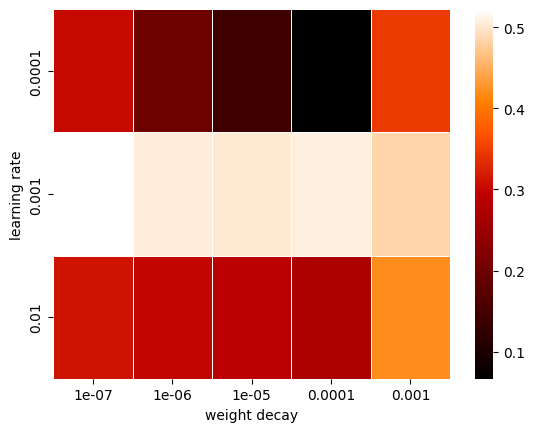

In [26]:
ax = sns.heatmap(accuracy_historic, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3],     
                 yticklabels=[1e-4, 1e-3, 1e-2])
ax.set(xlabel="weight decay", ylabel='learning rate')

In [17]:
best_params

(0.001, 1e-07)

In [18]:
model = CNN(num_epochs=100)
model.set_model(output_size=species.size, activation_function='relu')
model.set_optimizer(optim='SGD', lr=best_params[0], reg=best_params[1])

In [19]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.62407, Accuracy: 1.15%
Epoch 2/100, Loss: 4.57690, Accuracy: 2.45%
Epoch 3/100, Loss: 4.50706, Accuracy: 3.46%
Epoch 4/100, Loss: 4.36807, Accuracy: 4.47%
Epoch 5/100, Loss: 4.07754, Accuracy: 8.23%
Epoch 6/100, Loss: 3.75678, Accuracy: 10.68%
Epoch 7/100, Loss: 3.35802, Accuracy: 16.45%
Epoch 8/100, Loss: 3.04911, Accuracy: 20.78%
Epoch 9/100, Loss: 2.78210, Accuracy: 21.93%
Epoch 10/100, Loss: 2.48266, Accuracy: 29.58%
Epoch 11/100, Loss: 2.31125, Accuracy: 30.74%
Epoch 12/100, Loss: 2.16440, Accuracy: 36.65%
Epoch 13/100, Loss: 1.93709, Accuracy: 43.15%
Epoch 14/100, Loss: 1.86541, Accuracy: 42.86%
Epoch 15/100, Loss: 1.64444, Accuracy: 50.94%
Epoch 16/100, Loss: 1.58942, Accuracy: 50.07%
Epoch 17/100, Loss: 1.47467, Accuracy: 55.70%
Epoch 18/100, Loss: 1.45847, Accuracy: 53.39%
Epoch 19/100, Loss: 1.41099, Accuracy: 54.83%
Epoch 20/100, Loss: 1.24064, Accuracy: 61.33%
Epoch 21/100, Loss: 1.21416, Accuracy: 62.05%
Epoch 22/100, Loss: 1.06148, Accuracy: 67.53%
Ep

In [20]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 54.88% on test data


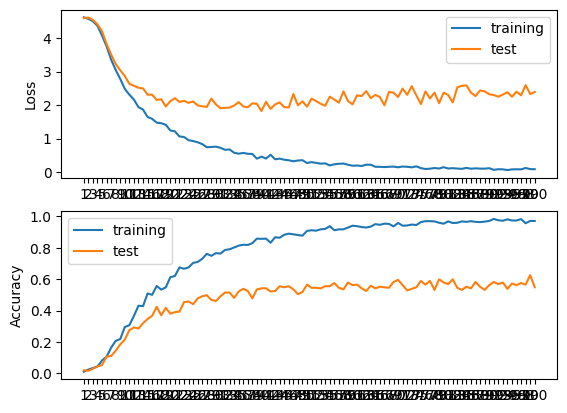

In [21]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')